In [1]:
import matplotlib.pyplot as plt
from util import Metric
import numpy as np

(10, 2, 2)
[0.8195487304224907, 0.8149319508419317, 0.8291081653240684, 0.8250497463763611, 0.8247913643389349, 0.8279077311334855, 0.8062611077493349, 0.8139639274968913, 0.8155795260805576, 0.8210722754441848]


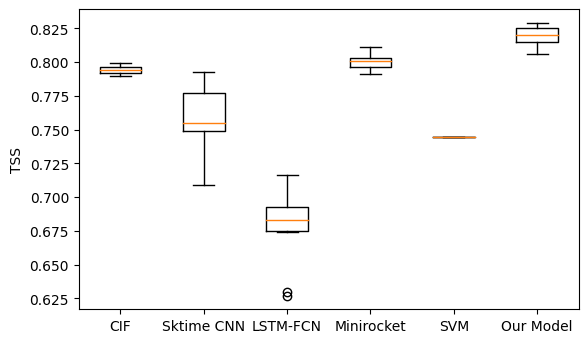

In [4]:
cif = np.load("./experiments_plot/baseline_cif_True_cm.npy")
cnn = np.load("./experiments_plot/baseline_cnn_True_cm.npy")
lstmfcn = np.load("./experiments_plot/baseline_lstmfcn_True_cm.npy")
minirocket = np.load("./experiments_plot/baseline_minirocket_True_cm.npy")
svm = np.load("./experiments_plot/baseline_svm_True_cm.npy")
mine = np.load("./experiments_plot/train_True_cm.npy")
print(mine.shape)
cif = [Metric(binary=True, cm=cm) for cm in cif]
cnn = [Metric(binary=True, cm=cm) for cm in cnn]
lstmfcn = [Metric(binary=True, cm=cm) for cm in lstmfcn]
minirocket = [Metric(binary=True, cm=cm) for cm in minirocket]
svm = [Metric(binary=True, cm=cm) for cm in svm]
mine = [Metric(binary=True, cm=cm) for cm in mine]

datashow = [[m.tss for m in cif],
            [m.tss for m in cnn],
            [m.tss for m in lstmfcn],
            [m.tss for m in minirocket],
            [m.tss for m in svm],
            [m.tss for m in mine]]
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(datashow)
ax.set_xticklabels(
    ["CIF", "Sktime CNN", "LSTM-FCN", "Minirocket", "SVM", "Our Model"])
print(datashow[-1])
plt.ylabel("TSS")
plt.show()

In [22]:
def stats(metrics):
    tss = [m.tss for m in metrics]
    hss2 = [m.hss2 for m in metrics]
    acc = [m.accuracy for m in metrics]
    prec = [m.precision for m in metrics]
    rec = [m.recall for m in metrics]
    f1 = [m.f1 for m in metrics]
    
    return ((np.average(tss), np.std(tss)), (np.average(hss2), np.std(hss2)),
            (np.average(acc), np.std(acc)), (np.average(prec), np.std(prec)),
            (np.average(rec), np.std(rec)), (np.average(f1), np.std(f1)))


cif = np.load("./experiments_plot/baseline_cif_True_cm.npy")
cnn = np.load("./experiments_plot/baseline_cnn_True_cm.npy")
lstmfcn = np.load("./experiments_plot/baseline_lstmfcn_True_cm.npy")
minirocket = np.load("./experiments_plot/baseline_minirocket_True_cm.npy")
svm = np.load("./experiments_plot/baseline_svm_True_cm.npy")
mine = np.load("./experiments_plot/train_True_cm.npy")

cif = [Metric(binary=True, cm=cm) for cm in cif]
cnn = [Metric(binary=True, cm=cm) for cm in cnn]
lstmfcn = [Metric(binary=True, cm=cm) for cm in lstmfcn]
minirocket = [Metric(binary=True, cm=cm) for cm in minirocket]
svm = [Metric(binary=True, cm=cm) for cm in svm]
mine = [Metric(binary=True, cm=cm) for cm in mine]

statsin = []
statsin.append(stats(cif))
statsin.append(stats(cnn))
statsin.append(stats(lstmfcn))
statsin.append(stats(minirocket))
statsin.append(stats(svm))
statsin.append(stats(mine))

metrics = ["TSS", "HSS2", "Accuracy", "Precision", "Recall", "F1"]
for j in range(len(metrics)):
    string = f"\t\t{metrics[j]} & "
    for i in range(len(statsin)):
        string += f" ${statsin[i][j][0]:.3f} \\pm {statsin[i][j][1]:.3f}$ "
        if i != 5: string += " & "
    string += " \\\\ "
    print(string)

		TSS &  $0.794 \pm 0.003$  &  $0.756 \pm 0.025$  &  $0.677 \pm 0.027$  &  $0.801 \pm 0.006$  &  $0.744 \pm 0.000$  &  $0.820 \pm 0.007$  \\ 
		HSS2 &  $0.219 \pm 0.004$  &  $0.327 \pm 0.012$  &  $0.208 \pm 0.034$  &  $0.250 \pm 0.011$  &  $0.217 \pm 0.000$  &  $0.200 \pm 0.017$  \\ 
		Accuracy &  $0.895 \pm 0.002$  &  $0.942 \pm 0.005$  &  $0.903 \pm 0.017$  &  $0.911 \pm 0.004$  &  $0.848 \pm 0.000$  &  $0.878 \pm 0.013$  \\ 
		Precision &  $0.141 \pm 0.002$  &  $0.221 \pm 0.011$  &  $0.138 \pm 0.022$  &  $0.162 \pm 0.007$  &  $0.150 \pm 0.000$  &  $0.129 \pm 0.011$  \\ 
		Recall &  $0.899 \pm 0.003$  &  $0.811 \pm 0.030$  &  $0.772 \pm 0.023$  &  $0.890 \pm 0.004$  &  $0.897 \pm 0.000$  &  $0.944 \pm 0.009$  \\ 
		F1 &  $0.244 \pm 0.004$  &  $0.347 \pm 0.011$  &  $0.233 \pm 0.032$  &  $0.273 \pm 0.010$  &  $0.256 \pm 0.000$  &  $0.226 \pm 0.016$  \\ 


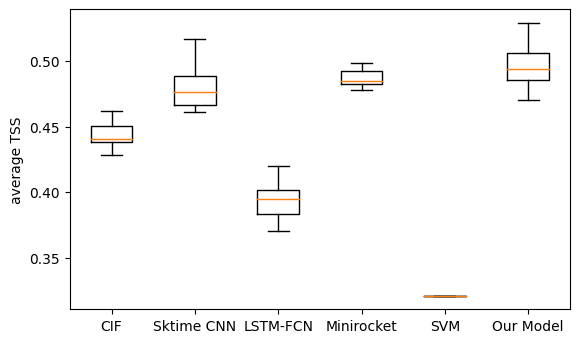

In [5]:
binary = False
cif = np.load(f"./experiments_plot/baseline_cif_{binary}_cm.npy")
cnn = np.load(f"./experiments_plot/baseline_cnn_{binary}_cm.npy")
lstmfcn = np.load(f"./experiments_plot/baseline_lstmfcn_{binary}_cm.npy")
minirocket = np.load(f"./experiments_plot/baseline_minirocket_{binary}_cm.npy")
svm = np.load(f"./experiments_plot/baseline_svm_{binary}_cm.npy")
mine = np.load(f"./experiments_plot/train_{binary}_cm.npy")

cif = [Metric(binary=False, cm=cm) for cm in cif]
cnn = [Metric(binary=False, cm=cm) for cm in cnn]
lstmfcn = [Metric(binary=False, cm=cm) for cm in lstmfcn]
minirocket = [Metric(binary=False, cm=cm) for cm in minirocket]
svm = [Metric(binary=False, cm=cm) for cm in svm]
mine = [Metric(binary=False, cm=cm) for cm in mine]
datashow = [[np.average(m.tss) for m in cif],
            [np.average(m.tss) for m in cnn],
            [np.average(m.tss) for m in lstmfcn],
            [np.average(m.tss) for m in minirocket],
            [np.average(m.tss) for m in svm],
            [np.average(m.tss) for m in mine]]
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(datashow)
ax.set_xticklabels(
    ["CIF", "Sktime CNN", "LSTM-FCN", "Minirocket", "SVM", "Our Model"])
plt.ylabel("average TSS")
plt.show()

In [42]:
binary = False


def stats(metrics):
    tss = [np.average(m.tss) for m in metrics]
    tss_each = []
    for i in range(4):
        tss_each.append([m.tss[i] for m in metrics])
    hss2 = [np.average(m.hss2) for m in metrics]
    acc = [np.average(m.accuracy) for m in metrics]
    prec = [np.average(m.precision) for m in metrics]
    rec = [np.average(m.recall) for m in metrics]
    f1 = [np.average(m.f1) for m in metrics]
    
    return ((np.average(tss), np.std(tss)),
            (np.average(tss_each[0]), np.std(tss_each[0])),
            (np.average(tss_each[1]), np.std(tss_each[1])),
            (np.average(tss_each[2]), np.std(tss_each[2])),
            (np.average(tss_each[3]), np.std(tss_each[3])),
            (np.average(hss2), np.std(hss2)),
            (np.average(acc), np.std(acc)), (np.average(prec), np.std(prec)),
            (np.average(rec), np.std(rec)), (np.average(f1), np.std(f1)))


cif = np.load(f"./experiments_plot/baseline_cif_{binary}_cm.npy")
cnn = np.load(f"./experiments_plot/baseline_cnn_{binary}_cm.npy")
lstmfcn = np.load(f"./experiments_plot/baseline_lstmfcn_{binary}_cm.npy")
minirocket = np.load(f"./experiments_plot/baseline_minirocket_{binary}_cm.npy")
svm = np.load(f"./experiments_plot/baseline_svm_{binary}_cm.npy")
mine = np.load(f"./experiments_plot/train_{binary}_cm.npy")

cif = [Metric(binary=binary, cm=cm) for cm in cif]
cnn = [Metric(binary=binary, cm=cm) for cm in cnn]
lstmfcn = [Metric(binary=binary, cm=cm) for cm in lstmfcn]
minirocket = [Metric(binary=binary, cm=cm) for cm in minirocket]
svm = [Metric(binary=binary, cm=cm) for cm in svm]
mine = [Metric(binary=binary, cm=cm) for cm in mine]

statsin = []
statsin.append(stats(cif))
statsin.append(stats(cnn))
statsin.append(stats(lstmfcn))
statsin.append(stats(minirocket))
statsin.append(stats(svm))
statsin.append(stats(mine))

metrics = ["TSS", "TSS  Class Q", "TSS  Class BC", "TSS  Class M", "TSS  Class X", "HSS2", "Accuracy",
           "Precision", "Recall", "F1"]
print(len(metrics))
for j in range(len(metrics)):
    if len(metrics[j].split("  ")) > 1:
        string = f"\t\t{metrics[j].split('  ')[0]} & {metrics[j].split('  ')[1]} & "
    else:
        string = f"\t\t\\multicolumn{{2}}{{l}}{{{metrics[j]}}} & "
    for i in range(len(statsin)):
        string += f" ${statsin[i][j][0]:.2f} \\pm {statsin[i][j][1]:.2f}$ "
        if i != 5: string += " & "
    string += " \\\\ "
    print(string)

10
		\multicolumn{2}{l}{TSS} &  $0.44 \pm 0.01$  &  $0.48 \pm 0.02$  &  $0.39 \pm 0.01$  &  $0.49 \pm 0.01$  &  $0.32 \pm 0.00$  &  $0.50 \pm 0.02$  \\ 
		TSS & Class Q &  $0.63 \pm 0.00$  &  $0.65 \pm 0.01$  &  $0.64 \pm 0.01$  &  $0.67 \pm 0.00$  &  $0.42 \pm 0.00$  &  $0.66 \pm 0.01$  \\ 
		TSS & Class BC &  $0.42 \pm 0.00$  &  $0.46 \pm 0.02$  &  $0.54 \pm 0.01$  &  $0.47 \pm 0.00$  &  $0.29 \pm 0.00$  &  $0.37 \pm 0.04$  \\ 
		TSS & Class M &  $0.44 \pm 0.01$  &  $0.58 \pm 0.04$  &  $0.31 \pm 0.02$  &  $0.55 \pm 0.01$  &  $0.27 \pm 0.00$  &  $0.49 \pm 0.04$  \\ 
		TSS & Class X &  $0.29 \pm 0.04$  &  $0.23 \pm 0.09$  &  $0.09 \pm 0.05$  &  $0.26 \pm 0.03$  &  $0.30 \pm 0.00$  &  $0.46 \pm 0.07$  \\ 
		\multicolumn{2}{l}{HSS2} &  $0.30 \pm 0.00$  &  $0.30 \pm 0.01$  &  $0.34 \pm 0.01$  &  $0.31 \pm 0.00$  &  $0.26 \pm 0.00$  &  $0.26 \pm 0.02$  \\ 
		\multicolumn{2}{l}{Accuracy} &  $0.89 \pm 0.00$  &  $0.85 \pm 0.00$  &  $0.91 \pm 0.00$  &  $0.87 \pm 0.00$  &  $0.85 \pm 0.00$  &  $